<a href="https://colab.research.google.com/github/Vijay3alaji/Statistics/blob/main/double_exponential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate a date range
dates = pd.date_range(start='2021-01-01', periods=100, freq='D')  # 100 days starting from Jan 1, 2021

# Create trend component (linear trend)
trend = np.linspace(50, 150, 100)  # Increases from 50 to 150 over 100 days

# Create random noise component
noise = np.random.normal(0, 10, 100)  # Mean 0, standard deviation 10

# Combine all components to form the time series
data = trend + noise

# Create a pandas Series
ts = pd.Series(data, index=dates)

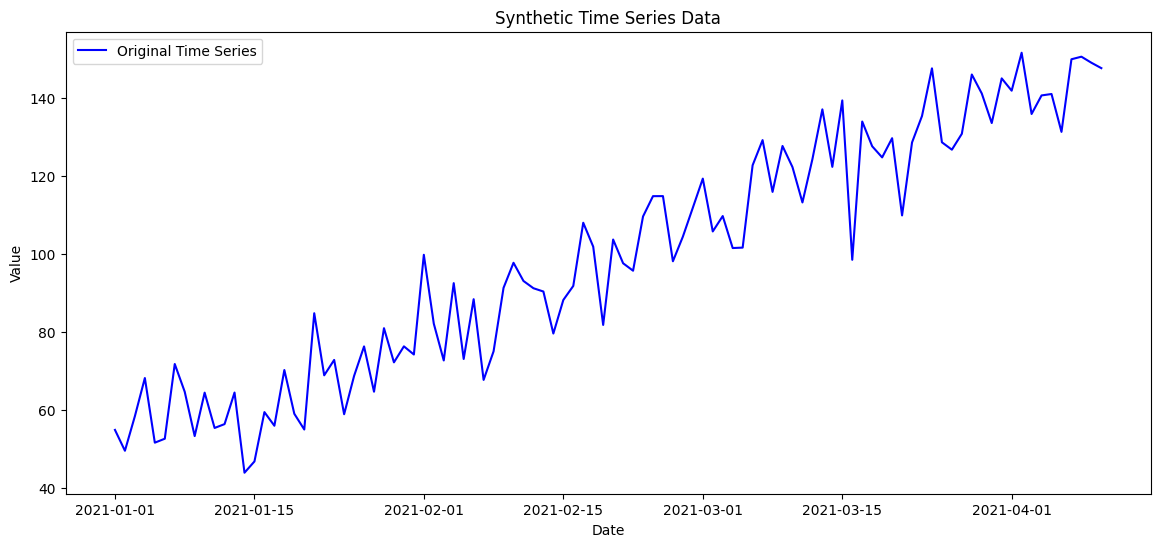

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Original Time Series', color='blue')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Define the Holt's Linear Trend model
holt_model = Holt(ts, damped_trend=False)

# Fit the model
holt_fit = holt_model.fit(optimized=True)

# Get the fitted values
fitted_values = holt_fit.fittedvalues

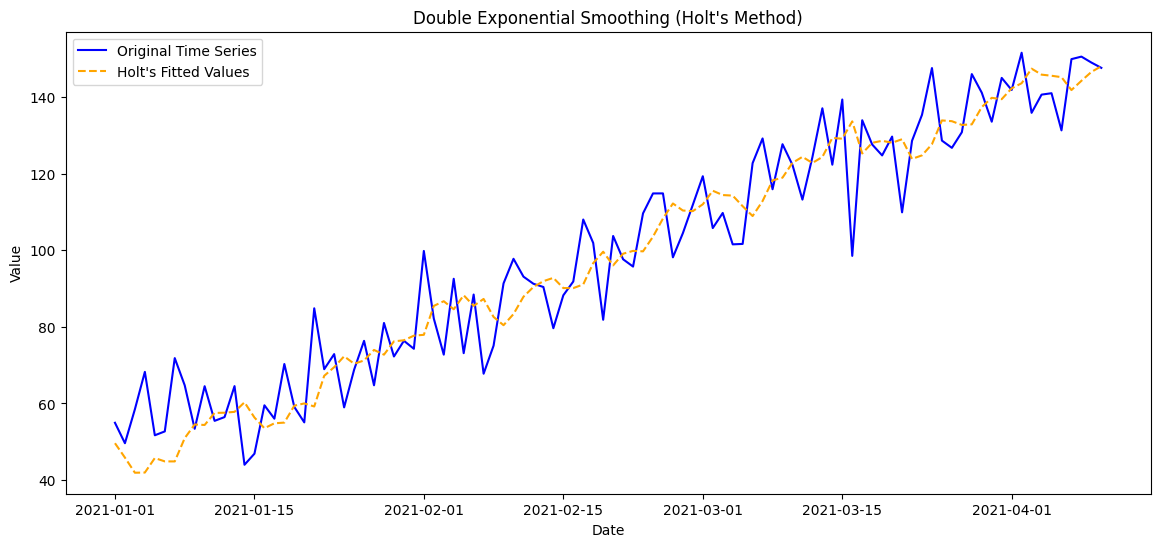

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Original Time Series', color='blue')
plt.plot(fitted_values, label='Holt\'s Fitted Values', linestyle='--', color='orange')
plt.title('Double Exponential Smoothing (Holt\'s Method)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

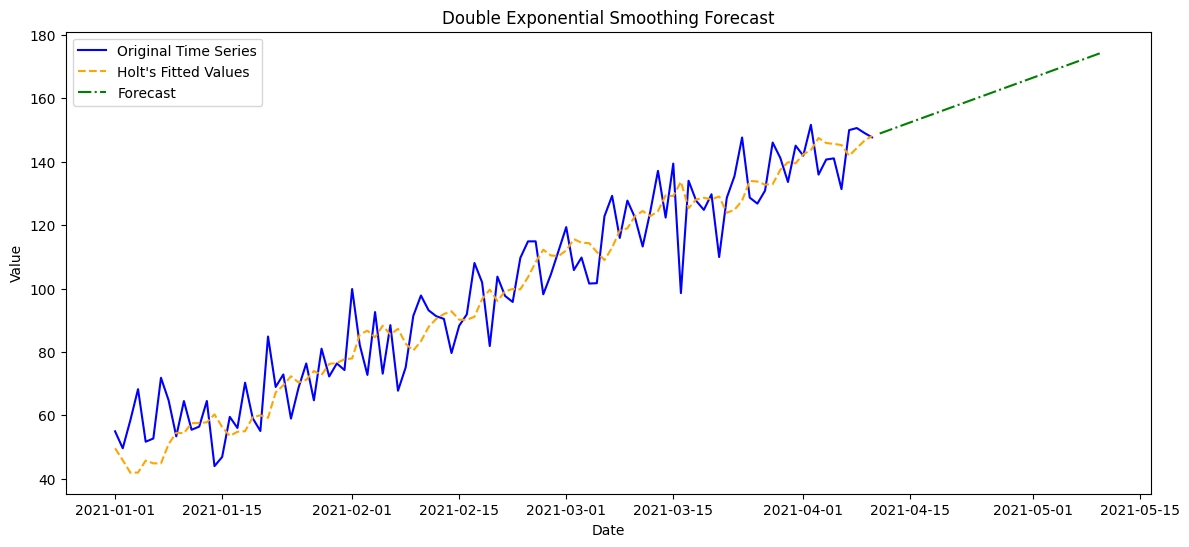

In [ ]:
# Forecast the next 30 days
forecast_steps = 30
forecast = holt_fit.forecast(forecast_steps)

# Create future dates for plotting
future_dates = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Original Time Series', color='blue')
plt.plot(fitted_values, label='Holt\'s Fitted Values', linestyle='--', color='orange')
plt.plot(future_dates, forecast, label='Forecast', linestyle='-.', color='green')
plt.title('Double Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MAE and MSE
mae = mean_absolute_error(ts, fitted_values)
mse = mean_squared_error(ts, fitted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 8.38
Mean Squared Error (MSE): 115.83
Root Mean Squared Error (RMSE): 10.76
